In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import Ridge, ElasticNet
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Gapminder Data

In [2]:
gap = pd.read_csv('gapminder.csv')
gap.head(3)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4


In [3]:
# Hehe, my gapminder data has no 'Region' field
region = ['Middle East & North Africa', 'Sub-Saharan Africa', 'America',
       'Europe & Central Asia', 'East Asia & Pacific',
       'Europe & Central Asia', 'Europe & Central Asia', 'America',
       'South Asia', 'America', 'Europe & Central Asia',
       'Europe & Central Asia', 'America', 'Sub-Saharan Africa',
       'South Asia', 'America', 'Sub-Saharan Africa', 'America',
       'Europe & Central Asia', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'East Asia & Pacific', 'Sub-Saharan Africa',
       'America', 'Sub-Saharan Africa', 'America', 'America',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'America',
       'Sub-Saharan Africa', 'Europe & Central Asia', 'America',
       'Europe & Central Asia', 'Middle East & North Africa', 'America',
       'Middle East & North Africa', 'America', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Europe & Central Asia',
       'East Asia & Pacific', 'Europe & Central Asia',
       'Europe & Central Asia', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Europe & Central Asia',
       'Europe & Central Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'America', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'America', 'America', 'America',
       'Europe & Central Asia', 'Europe & Central Asia', 'South Asia',
       'East Asia & Pacific', 'Middle East & North Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'Europe & Central Asia', 'America', 'East Asia & Pacific',
       'Europe & Central Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Europe & Central Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'East Asia & Pacific',
       'South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'America',
       'Europe & Central Asia', 'East Asia & Pacific',
       'Middle East & North Africa', 'Sub-Saharan Africa',
       'East Asia & Pacific', 'South Asia', 'Europe & Central Asia',
       'East Asia & Pacific', 'America', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'South Asia', 'America',
       'East Asia & Pacific', 'America', 'America', 'East Asia & Pacific',
       'Europe & Central Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'Europe & Central Asia',
       'Europe & Central Asia', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Europe & Central Asia',
       'Sub-Saharan Africa', 'East Asia & Pacific',
       'Europe & Central Asia', 'Europe & Central Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'South Asia', 'Sub-Saharan Africa',
       'America', 'Sub-Saharan Africa', 'Europe & Central Asia',
       'Europe & Central Asia', 'Europe & Central Asia',
       'Sub-Saharan Africa', 'East Asia & Pacific', 'Sub-Saharan Africa',
       'America', 'Middle East & North Africa', 'Europe & Central Asia',
       'Sub-Saharan Africa', 'Europe & Central Asia',
       'Europe & Central Asia', 'America', 'America',
       'Europe & Central Asia', 'East Asia & Pacific',
       'Sub-Saharan Africa', 'Sub-Saharan Africa']

In [4]:
gap['Region'] = region

In [5]:
gap.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


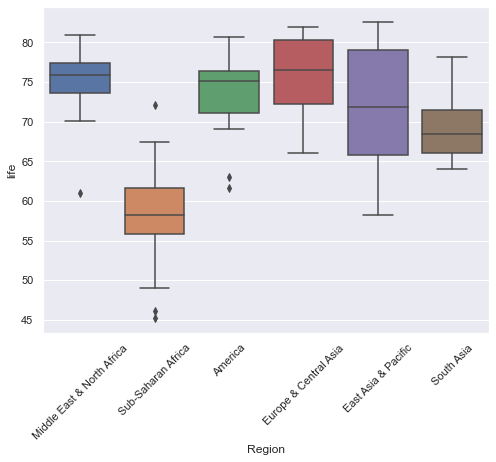

In [10]:
# Boxplot of life expectancy per region
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x='Region', y='life', data=gap, ax=ax)

plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

In [11]:
data = gap.copy()

In [13]:
data = pd.get_dummies(data, columns=['Region'], drop_first=True)
data.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


In [14]:
data.shape

(139, 14)

In [15]:
X = data.drop('life', axis=1) #input
y = data['life'] #output

## Regression

### Ridge regression
(No train-test split for now)

In [17]:
# Initiate ridge regressor
model1 = Ridge(alpha=0.5, normalize=True)

In [19]:
# 5-fold cross validation
model1_cv_scores = cross_val_score(model1, X, y, cv=5)

In [20]:
print(f'Acc: {model1_cv_scores}')

Acc: [0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


# Utilizing `SimpleImputer` and `Pipeline` from `sklearn`

## Data and Data Preprocessing

Here, we use the [Congressional Voting Records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) once again and impute missing values

In [55]:
names = ['party', 'infants', 'water', 'budget', 
         'physician', 'salvador', 'relgious', 'satellite', 
         'aid', 'missile', 'immigration', 'synfuels', 
         'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
vote = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                   names=names, na_values='?')
vote.head()

,party,infants,water,budget,physician,salvador,relgious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [56]:
vote_ = vote.copy()

In [57]:
for column in range(1, vote_.shape[1]):
    vote_.iloc[:, column] = vote_.iloc[:, column].map({'y': 1, 'n': 0})

vote_.head()

,party,infants,water,budget,physician,salvador,relgious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [58]:
X = vote_.drop('party', axis=1) # input
y = vote_['party'] #output

## SVM

In [59]:
# Setup imputation transformer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [60]:
# Initiate the SVC classifier
svc = SVC()

In [61]:
# Setup pipeline with required steps
steps = [('imputation', imp),
         ('SVM', svc)]

In [62]:
# Create pipeline
model2 = Pipeline(steps)

In [63]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
# Fit pipeline to data
model2.fit(X_train, y_train)

Pipeline(steps=[('imputation', SimpleImputer(strategy='most_frequent')),
                ('SVM', SVC())])

In [65]:
# Predict labels of test set
y_pred = model2.predict(X_test)

In [67]:
# Compute metrics (classification report)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.98      0.96      0.97        85
  republican       0.94      0.96      0.95        46

    accuracy                           0.96       131
   macro avg       0.96      0.96      0.96       131
weighted avg       0.96      0.96      0.96       131



# Centered and Scaled Data with [White Wine Quality](http://archive.ics.uci.edu/ml/datasets/Wine+Quality) dataset

In [69]:
wine = pd.read_csv('winequality-white.csv', delimiter=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [71]:
wine.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [72]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## Data Preprocessing

In [77]:
wine_ = wine.copy()

In [78]:
# The 'quality' field is turned into a binary target variable
# where quality > 5 is 0 and 1 otherwise
wine_['quality'] = np.where(wine_['quality']>5, 0, 1)
wine_.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [86]:
X = wine_.drop('quality', axis=1).to_numpy() #input
y = wine_['quality'].to_numpy() #output

In [87]:
# Scale the features
X_scaled = scale(X)

In [88]:
# Mean and std of X
print(f'Mean of X: {np.mean(X)}')
print(f'Std of X: {np.std(X)}')

Mean of X: 18.432687072460002
Std of X: 41.54494764094571


In [89]:
print(f'Mean of X_scaled: {np.mean(X_scaled)}')
print(f'Std of X_scaled: {np.std(X_scaled)}')

Mean of X_scaled: 2.739937614267761e-15
Std of X_scaled: 0.9999999999999999


## Centering and scaling in a `Pipeline`

In [92]:
# Setup the pipeline steps
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]

In [93]:
# Create pipeline
model3 = Pipeline(steps)

In [94]:
# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
# Fit to training data
model_scaled = model3.fit(X_train, y_train)

In [96]:
# To compare, we fit a model to an unscaled data
model_unscaled = KNeighborsClassifier().fit(X_train, y_train)

In [97]:
print(f'Acc with scaling: {model_scaled.score(X_test, y_test)}')
print(f'Acc without scaling: {model_unscaled.score(X_test, y_test)}')

Acc with scaling: 0.7700680272108843
Acc without scaling: 0.6979591836734694


## Bringing it all together: Pipeline for classification

In [99]:
# Setup pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

In [100]:
# Pipeline
model4 = Pipeline(steps)

In [101]:
# Define hyperparameter space
parameters = {'SVM__C': [1, 10, 100],
              'SVM__gamma': [0.1, 0.01]}

In [102]:
# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [103]:
# Initiate GridSearchCV object
model4_cv = GridSearchCV(model4, parameters, cv=3)

In [104]:
# Fit to training data
model4_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVM', SVC())]),
             param_grid={'SVM__C': [1, 10, 100], 'SVM__gamma': [0.1, 0.01]})

In [105]:
# Predict labels of test set
y_pred = model4_cv.predict(X_test)

In [106]:
# Compute and print metrics
print(f'Acc: {model4_cv.score(X_test, y_test)}')
print(classification_report(y_test, y_pred))
print(f'Tuned Model Parameters: {model4_cv.best_params_}')

Acc: 0.7795918367346939
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       662
           1       0.67      0.63      0.65       318

    accuracy                           0.78       980
   macro avg       0.75      0.74      0.74       980
weighted avg       0.78      0.78      0.78       980

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}


# Back to Gapminder
This time, with a complete pipeline from imputation to an ElasticNet() classifier

In [107]:
gap_ = gap.copy()

In [108]:
gap_.shape

(139, 10)

In [110]:
gap_ = gap_.drop('Region', axis=1)

In [112]:
X = gap_.drop('life', axis=1) #input
y = gap_['life'] #output

In [115]:
# Setup pipeline steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

In [117]:
# Create pipeline
model5 = Pipeline(steps)

In [118]:
# Specify hyperparameter space
parameters = {'elasticnet__l1_ratio': np.linspace(0, 1, 30)}

In [119]:
# Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [120]:
# Create GridSearchCV object
model5_cv = GridSearchCV(model5, parameters, cv=3)

In [121]:
# Fit to training data
model5_cv.fit(X_train, y_train)

C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 734.414886185167, tolerance: 0.4518648363636364
  positive)
C:\Users\loujo\anaconda3\envs\tf2-gpu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 763.9901914108575, tolerance: 0.4854468571428572
  positive)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('imputation', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__l1_ratio': array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])})

In [126]:
# Compute and print the metrics
r2 = model5_cv.score(X_test, y_test)
print(f'Tuned ElasticNet Alpha: {model5_cv.best_params_}')
print(f'Tuned ElasticNet R squared: {r2}')

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016570888216
